TOPIK MODELING

Topic modeling merupakan salah satu pendekatan pada Text Mining yang cukup handal dalam melakukan penemuan data-data teks yang tersembunyi dan menemukan hubungan antara teks yang satu dengan lainnya dari suatu corpus (Jelodar, et al., 2018).
Sederhananya yaitu mengelompokkan data teks berdasarkan suatu topik tertentu. Cara kerja topik modelling seperti clustering, dikatakan seperti clustering karena mengelompokkan dokumen berdasarkan kemiripannya. Topic Modelling termasuk unsupervised learning karena data yang digunakan tidak memiliki label.

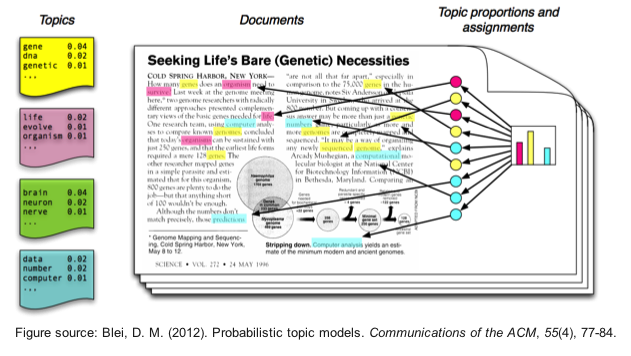

Oke buddy, salah satu metode Topic Modeling adalah dengan menggunakan metode Latent Dirichlet Allocation (LDA). LDA pertama kali diperkenalkan oleh Blei, Ng dan Jordan pada tahun 2003, adalah salah satu metode paling populer dalam pemodelan topik. (Putra & Kusumawardani, 2017) mengatakan bahwa LDA dapat digunakan untuk meringkas, melakukan klasterisasi, menghubungkan maupun memproses data yang sangat besar karena LDA menghasilkan daftar topik yang diberi bobot untuk masing-masing dokumen. Topik yang muncul dari pengolahan data tersebut selanjutnya akan dilakukan uji koherensi topik, yaitu keterkaitan dari uraian probabilitas kata-kata yang ditemukan satu sama lain dalam menyusun suatu topik.

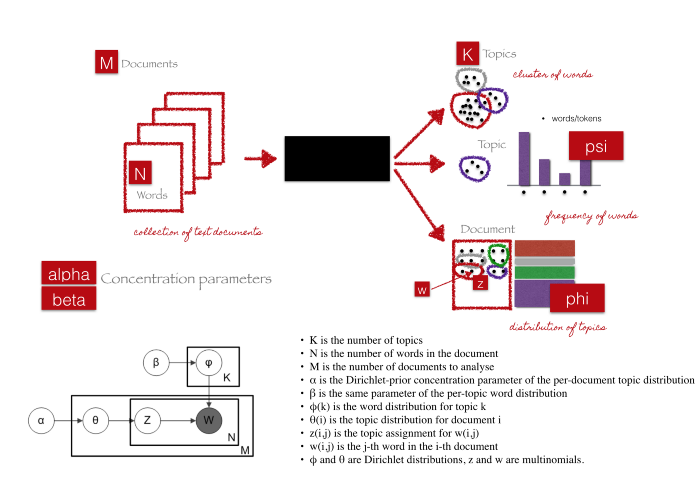

In [1]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
#nltk.download('all')

import os
import nltk.collections

path = nltk.data.find("corpora")
print(path)
print(os.listdir(nltk.data.find("corpora")))

/home/cak/nltk_data/corpora
['twitter_samples.zip', 'kimmo.zip', 'nps_chat', 'nombank.1.0.zip', 'smultron', 'floresta.zip', 'state_union', 'sentiwordnet.zip', 'chat80', 'chat80.zip', 'nonbreaking_prefixes.zip', 'lin_thesaurus.zip', 'conll2000.zip', 'framenet_v15.zip', 'sentence_polarity', 'opinion_lexicon.zip', 'mte_teip5', 'wordnet.zip', 'unicode_samples', 'city_database', 'pros_cons', 'udhr.zip', 'gutenberg', 'timit.zip', 'omw', 'webtext', 'sinica_treebank.zip', 'kimmo', 'subjectivity.zip', 'movie_reviews', 'gutenberg.zip', 'udhr2.zip', 'movie_reviews.zip', 'comparative_sentences', 'dependency_treebank.zip', 'twitter_samples', 'words.zip', 'inaugural.zip', 'names', 'toolbox.zip', 'biocreative_ppi.zip', 'brown.zip', 'inaugural', 'cmudict', 'conll2007.zip', 'omw.zip', 'pil.zip', 'qc', 'product_reviews_1.zip', 'stopwords', 'names.zip', 'opinion_lexicon', 'qc.zip', 'swadesh.zip', 'paradigms', 'conll2000', 'mac_morpho.zip', 'paradigms.zip', 'brown_tei', 'cess_esp', 'verbnet', 'pil', 'mach

In [2]:
nltk.corpus.treebank.fileids()

['wsj_0001.mrg',
 'wsj_0002.mrg',
 'wsj_0003.mrg',
 'wsj_0004.mrg',
 'wsj_0005.mrg',
 'wsj_0006.mrg',
 'wsj_0007.mrg',
 'wsj_0008.mrg',
 'wsj_0009.mrg',
 'wsj_0010.mrg',
 'wsj_0011.mrg',
 'wsj_0012.mrg',
 'wsj_0013.mrg',
 'wsj_0014.mrg',
 'wsj_0015.mrg',
 'wsj_0016.mrg',
 'wsj_0017.mrg',
 'wsj_0018.mrg',
 'wsj_0019.mrg',
 'wsj_0020.mrg',
 'wsj_0021.mrg',
 'wsj_0022.mrg',
 'wsj_0023.mrg',
 'wsj_0024.mrg',
 'wsj_0025.mrg',
 'wsj_0026.mrg',
 'wsj_0027.mrg',
 'wsj_0028.mrg',
 'wsj_0029.mrg',
 'wsj_0030.mrg',
 'wsj_0031.mrg',
 'wsj_0032.mrg',
 'wsj_0033.mrg',
 'wsj_0034.mrg',
 'wsj_0035.mrg',
 'wsj_0036.mrg',
 'wsj_0037.mrg',
 'wsj_0038.mrg',
 'wsj_0039.mrg',
 'wsj_0040.mrg',
 'wsj_0041.mrg',
 'wsj_0042.mrg',
 'wsj_0043.mrg',
 'wsj_0044.mrg',
 'wsj_0045.mrg',
 'wsj_0046.mrg',
 'wsj_0047.mrg',
 'wsj_0048.mrg',
 'wsj_0049.mrg',
 'wsj_0050.mrg',
 'wsj_0051.mrg',
 'wsj_0052.mrg',
 'wsj_0053.mrg',
 'wsj_0054.mrg',
 'wsj_0055.mrg',
 'wsj_0056.mrg',
 'wsj_0057.mrg',
 'wsj_0058.mrg',
 'wsj_0059.mrg

In [3]:
data = nltk.corpus.treebank.words('wsj_0118.mrg')
print(data)

for word in data[:500]:
    print(word, sep=' ', end=' ')

['In', 'the', 'aftermath', 'of', 'the', 'stock', ...]
In the aftermath of the stock market 's gut-wrenching 190-point drop on Oct. 13 , Kidder , Peabody & Co. 's 1,400 stockbrokers across the country began a telephone and letter-writing campaign aimed * at * quashing the country 's second-largest program trader . The target of their wrath ? Their own employer , Kidder Peabody . Since October 's minicrash , Wall Street has been shaken *-69 by an explosion of resentment against program trading , the computer-driven , lightning-fast trades of huge baskets of stocks and futures that *T*-1 can send stock prices reeling in minutes . But the heated fight over program trading is about much more than a volatile stock market . The real battle is over who *T*-1 will control that market and reap its huge rewards . Program trading itself , according to many academics who *T*-64 have studied it , is merely caught *-1 in the middle of this battle , *-1 unfairly labeled *-2 as the evil driving force o

In [4]:
text = ' '.join(data[:1000])
def get_summary(text, pct):
    summary = summarize(text, ratio=pct, split=True)
    return summary
#" ".join(text)
#text

In [5]:
def get_keyword(text):
    res = keywords(text, 
                   ratio=0.1, 
                   words=None,
                   split=False,
                   scores=False,
                   pos_filter=('NN','JJ'),
                   lemmatize=False, 
                   deacc=False)
    res = res.split('\n')
    return res

In [6]:
print("Input text\n")
print("--------------------------------------------------------------------")
print(text)
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("Printing Summary")
print("--------------------------------------------------------------------")
print(get_summary(text, 0.3))
print("--------------------------------------------------------------------")
print("\nPrinting Keywords")
print("--------------------------------------------------------------------")
print(get_keyword(text))

Input text

--------------------------------------------------------------------
In the aftermath of the stock market 's gut-wrenching 190-point drop on Oct. 13 , Kidder , Peabody & Co. 's 1,400 stockbrokers across the country began a telephone and letter-writing campaign aimed * at * quashing the country 's second-largest program trader . The target of their wrath ? Their own employer , Kidder Peabody . Since October 's minicrash , Wall Street has been shaken *-69 by an explosion of resentment against program trading , the computer-driven , lightning-fast trades of huge baskets of stocks and futures that *T*-1 can send stock prices reeling in minutes . But the heated fight over program trading is about much more than a volatile stock market . The real battle is over who *T*-1 will control that market and reap its huge rewards . Program trading itself , according to many academics who *T*-64 have studied it , is merely caught *-1 in the middle of this battle , *-1 unfairly labeled *-2 

In [7]:
def sent_to_word(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [8]:
print(list(sent_to_word(get_summary(text, 0.3))))

[['in', 'the', 'aftermath', 'of', 'the', 'stock', 'market', 'gut', 'wrenching', 'point', 'drop', 'on', 'oct', 'kidder', 'peabody', 'co'], ['on', 'one', 'side', 'of', 'this', 'power', 'struggle', 'stand', 'the', 'forces', 'in', 'ascendency', 'on', 'wall', 'street', 'the', 'new', 'guard', 'consisting', 'of', 'high', 'tech', 'computer', 'wizards', 'at', 'the', 'major', 'brokerage', 'firms', 'their', 'pension', 'fund', 'clients', 'with', 'immense', 'pools', 'of', 'money', 'and', 'the', 'traders', 'at', 'the', 'fast', 'growing', 'chicago', 'futures', 'exchanges'], ['defending', 'their', 'ramparts', 'are', 'wall', 'street', 'old', 'guard', 'the', 'traditional', 'stock', 'picking', 'money', 'managers', 'tens', 'of', 'thousands', 'of', 'stock', 'brokers', 'the', 'new', 'york', 'stock', 'exchange', 'listed', 'companies', 'and', 'the', 'clannish', 'floor', 'traders', 'known', 'as', 'specialists', 'who', 'make', 'markets', 'in', 'their', 'stocks'], ['so', 'far', 'wall', 'street', 'old', 'guard', 

In [9]:
import re

New_text = re.sub('[^a-zA-Z0-9]', ' ', text)
print(New_text)

In the aftermath of the stock market  s gut wrenching 190 point drop on Oct  13   Kidder   Peabody   Co   s 1 400 stockbrokers across the country began a telephone and letter writing campaign aimed   at   quashing the country  s second largest program trader   The target of their wrath   Their own employer   Kidder Peabody   Since October  s minicrash   Wall Street has been shaken   69 by an explosion of resentment against program trading   the computer driven   lightning fast trades of huge baskets of stocks and futures that  T  1 can send stock prices reeling in minutes   But the heated fight over program trading is about much more than a volatile stock market   The real battle is over who  T  1 will control that market and reap its huge rewards   Program trading itself   according to many academics who  T  64 have studied it   is merely caught   1 in the middle of this battle     1 unfairly labeled   2 as the evil driving force of the marketplace   The evidence indicates that progra

In [10]:
stop_word =set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(New_text))
filter_sentence = [w for w in word_tokens if not w in stop_word]
normalisai =" ".join(lemma.lemmatize(word) for word in filter_sentence)

In [11]:
from nltk import ngrams
n=2
total_gram = []
number_of_grams = ngrams(normalisai.split(), n)
for grams in number_of_grams:
    total_gram.append(grams)

print(total_gram[:10])

[('In', 'aftermath'), ('aftermath', 'stock'), ('stock', 'market'), ('market', 'gut'), ('gut', 'wrenching'), ('wrenching', '190'), ('190', 'point'), ('point', 'drop'), ('drop', 'Oct'), ('Oct', '13')]


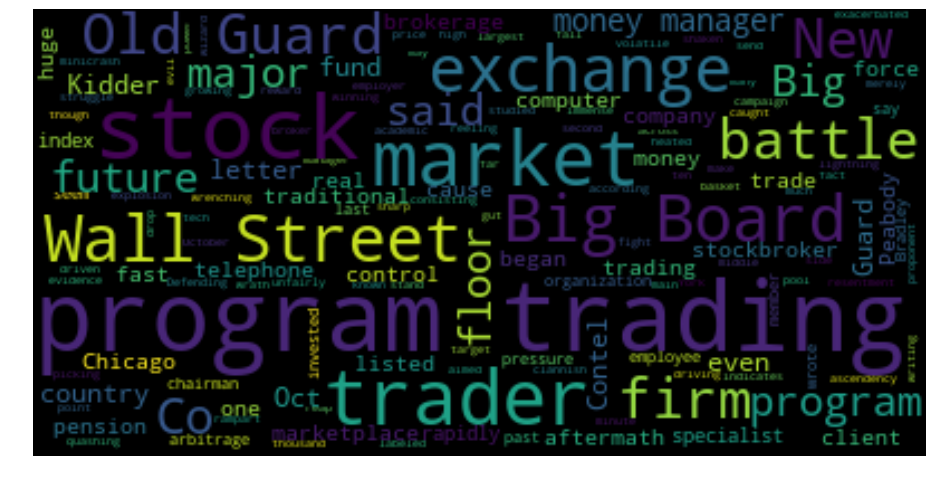

In [12]:
from  wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=60).generate(normalisai)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
count={}
for w in normalisai.split():
    if w in count:
        count[w] +=1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 6:
        print("%s Telah ditemukan %s Kali " %(word, times))

stock Telah ditemukan 12 Kali 
market Telah ditemukan 9 Kali 
1 Telah ditemukan 21 Kali 
program Telah ditemukan 18 Kali 
trader Telah ditemukan 9 Kali 
The Telah ditemukan 7 Kali 
Wall Telah ditemukan 7 Kali 
Street Telah ditemukan 7 Kali 
trading Telah ditemukan 18 Kali 
T Telah ditemukan 16 Kali 
Guard Telah ditemukan 8 Kali 
Big Telah ditemukan 7 Kali 
Board Telah ditemukan 7 Kali 


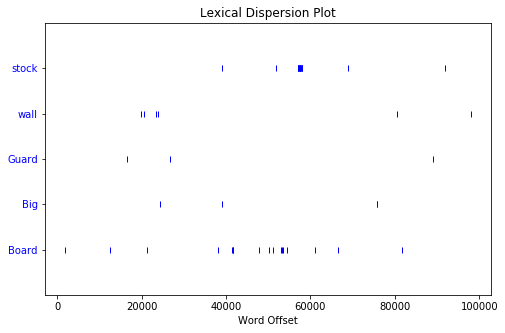

In [14]:
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import brown

brown.categories()
plt.figure(figsize=(8,5))
topics = ['stock','wall','Guard','Big','Board']
dispersion_plot(brown.words(categories='news'), topics)


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


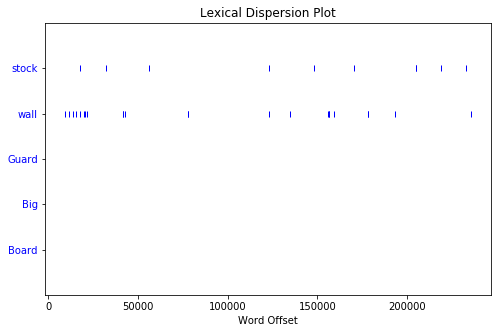

In [15]:
from nltk.book import text1 as content
plt.figure(figsize=(8,5))
topics = ['stock','wall','Guard','Big','Board']
content.dispersion_plot (topics)


In [16]:
def sent_to_word(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [21]:
import gensim
from gensim import corpora
tokenized_sent= list(sent_to_word(filter_sentence))
dictionary = corpora.Dictionary(tokenized_sent)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sent]
print(doc_term_matrix)

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [], [(6, 1)], [(7, 1)], [(8, 1)], [], [(9, 1)], [(10, 1)], [(11, 1)], [], [], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(14, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(9, 1)], [(10, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [], [(37, 1)], [(38, 1)], [(24, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(43, 1)], [(44, 1)], [(45, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [], [], [(49, 1)], [(2, 1)], [(50, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(55, 1)], [(24, 1)], [(39, 1)], [(56, 1)], [(57, 1)], [(2, 1)], [(3, 1)], [(26, 1)], [(58, 1)], [(59, 1)], [], [], [(60, 1)], [(3, 1)], [(61, 1)], [(45, 1)], [(62, 1)], [(24, 1)], [(39, 1)], [(63, 1)], [(64, 1)], [(65, 1)], [], [], [(66, 1)], [(67, 1)], [(68, 1)], [], [(69, 1)], [(59, 1)], [], [(70, 1)], [(71, 1)], [], [

In [23]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word=dictionary, passes=100)
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.122*"program" + 0.043*"wall" + 0.019*"kidder" + 0.019*"oct" + 0.013*"members" + 0.013*"one" + 0.013*"traditional" + 0.013*"cause" + 0.007*"may" + 0.007*"manager" + 0.007*"layer" + 0.007*"approve" + 0.007*"another" + 0.007*"form" + 0.007*"though" + 0.007*"merrill" + 0.007*"lynch" + 0.007*"public" + 0.007*"banking" + 0.007*"forces"'), (1, '0.049*"traders" + 0.037*"exchange" + 0.025*"firms" + 0.025*"said" + 0.019*"futures" + 0.019*"country" + 0.013*"index" + 0.013*"fund" + 0.013*"companies" + 0.013*"chairman" + 0.013*"chicago" + 0.013*"he" + 0.013*"employee" + 0.013*"bradley" + 0.013*"marketplace" + 0.013*"letter" + 0.007*"conceding" + 0.007*"charges" + 0.007*"current" + 0.007*"what"'), (2, '0.104*"trading" + 0.035*"money" + 0.030*"new" + 0.030*"old" + 0.024*"co" + 0.024*"managers" + 0.013*"like" + 0.013*"past" + 0.013*"clients" + 0.013*"aftermath" + 0.013*"control" + 0.013*"rapidly" + 0.013*"trades" + 0.013*"listed" + 0.013*"arbitrage" + 0.007*"rewards" + 0.007*"future" + 0.007*"

In [24]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))
coherence_model_lda=CoherenceModel(
    model = ldamodel,
    texts=tokenized_sent,
    dictionary = dictionary,
    coherence="c_v"
)
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score : ", coherence_lda)




Perplexity:  -6.990711995558456
Coherence Score :  0.8429121181683547


In [25]:
pyLDAvis.enable_notebook()
visualisasi = pyLDAvis.gensim.prepare(ldamodel, 
                                      doc_term_matrix,
                                      dictionary
                                     )
visualisasi

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.193153  0.046128       1        1  21.976681
2     -0.098123  0.161154       2        1  20.266195
1     -0.031812 -0.063104       3        1  19.410769
0     -0.037631 -0.100190       4        1  19.410765
4     -0.025587 -0.043988       5        1  18.935587, topic_info=    Category      Freq          Term      Total  loglift  logprob
24   Default  12.00000       program  12.000000   30.000  30.0000
39   Default  11.00000       trading  11.000000   29.000  29.0000
156  Default   7.00000           big   7.000000   28.000  28.0000
2    Default   7.00000         stock   7.000000   27.000  27.0000
94   Default   5.00000         guard   5.000000   26.000  26.0000
108  Default   5.00000       traders   5.000000   25.000  25.0000
34   Default   4.00000          wall   4.000000   24.000  24.0000
3    Default   5.00000        market   5.000000   23.000  23.0000
125  Default   4.00000      exchange   4.000000   22.000  22.0000
35   Default   4.00000        street   4.000000   21.000  21.0000
157  Default   4.00000         board   4.000000   20.000  20.0000
26   Default   4.00000           the   4.000000   19.000  19.0000
107  Default   4.00000         money   4.000000   18.000  18.0000
117  Default   3.00000           old   3.000000   17.000  17.0000
93   Default   3.00000           new   3.000000   16.000  16.0000
59   Default   3.00000        battle   3.000000   15.000  15.0000
101  Default   3.00000         firms   3.000000   14.000  14.0000
233  Default   3.00000          said   3.000000   13.000  13.0000
11   Default   3.00000            co   3.000000   12.000  12.0000
120  Default   3.00000      managers   3.000000   11.000  11.0000
99   Default   3.00000         major   3.000000   10.000  10.0000
9    Default   2.00000        kidder   2.000000    9.000   9.0000
8    Default   2.00000           oct   2.000000    8.000   8.0000
14   Default   2.00000       country   2.000000    7.000   7.0000
48   Default   2.00000       futures   2.000000    6.000   6.0000
129  Default   2.00000         floor   2.000000    5.000   5.0000
221  Default   2.00000        contel   2.000000    4.000   4.0000
185  Default   2.00000          even   2.000000    3.000   3.0000
58   Default   1.00000          real   1.000000    2.000   2.0000
15   Default   1.00000         began   1.000000    1.000   1.0000
..       ...       ...           ...        ...      ...      ...
269   Topic5   0.74224        waited   1.229998    1.159  -4.8993
268   Topic5   0.74224         crash   1.229998    1.159  -4.8993
214   Topic5   0.74224    executives   1.229998    1.159  -4.8993
136   Topic5   0.74224         seems   1.229998    1.159  -4.8993
143   Topic5   0.74224      bludgeon   1.229998    1.159  -4.8993
240   Topic5   0.74224          kill   1.229998    1.159  -4.8993
72    Topic5   0.74224          evil   1.229998    1.159  -4.8993
71    Topic5   0.74224       labeled   1.229998    1.159  -4.8993
189   Topic5   0.74224         broad   1.229998    1.159  -4.8993
4     Topic5   0.74224           gut   1.229998    1.159  -4.8993
69    Topic5   0.74224        middle   1.229998    1.159  -4.8993
172   Topic5   0.74224        houses   1.229998    1.159  -4.8993
328   Topic5   0.74224       bankers   1.229998    1.159  -4.8993
153   Topic5   0.74224          slow   1.229998    1.159  -4.8993
70    Topic5   0.74224      unfairly   1.229998    1.159  -4.8993
155   Topic5   0.74224       falling   1.229998    1.159  -4.8993
332   Topic5   0.74224       premier   1.229998    1.159  -4.8993
68    Topic5   0.74224        caught   1.229998    1.159  -4.8993
50    Topic5   0.74224        prices   1.229998    1.159  -4.8993
236   Topic5   0.74224        single   1.229998    1.159  -4.8993
111   Topic5   0.74224     exchanges   1.229998    1.159  -4.8993
184   Topic5   0.74224        refuse   1.229998    1.159  -4.8993
49    Topic5   